In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd "gdrive/MyDrive/Dati-TBDM/refined_data"

/content/gdrive/.shortcut-targets-by-id/1xGTanGyuk-TCLCMoGz5VNG7sUEscVC-Z/Dati-TBDM/refined_data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
energy_fermate_merged = pd.read_csv("energy_fermate_merged.csv")

In [44]:
pd.set_option('display.max_colwidth',1000)

stop_code_4_dates = energy_fermate_merged[energy_fermate_merged['STOP_CODE'] == 4].groupby(['SHIFT_DATE', 'STOP_CODE', 'DESFERM']).size().reset_index(name='Occurrences')

stop_code_4_occurrences = energy_fermate_merged[energy_fermate_merged['STOP_CODE'] == 4].groupby(['SHIFT_DATE', 'STOP_CODE', 'DESFERM', 'RESOURCE']).size().reset_index(name='Occurrences')

pd.set_option('display.expand_frame_repr', False)

print(stop_code_4_dates)


     SHIFT_DATE  STOP_CODE                                   DESFERM  Occurrences
0    2022-11-28          4  Manutenzione ordinaria                              9
1    2022-11-29          4  Manutenzione ordinaria                              5
2    2022-11-30          4  Manutenzione ordinaria                             12
3    2022-12-01          4  Manutenzione ordinaria                              8
4    2022-12-02          4  Manutenzione ordinaria                              9
..          ...        ...                                       ...          ...
270  2023-11-21          4  Manutenzione ordinaria                              6
271  2023-11-22          4  Manutenzione ordinaria                             11
272  2023-11-23          4  Manutenzione ordinaria                              9
273  2023-11-24          4  Manutenzione ordinaria                             11
274  2023-11-25          4  Manutenzione ordinaria                              1

[275 rows x 4 c

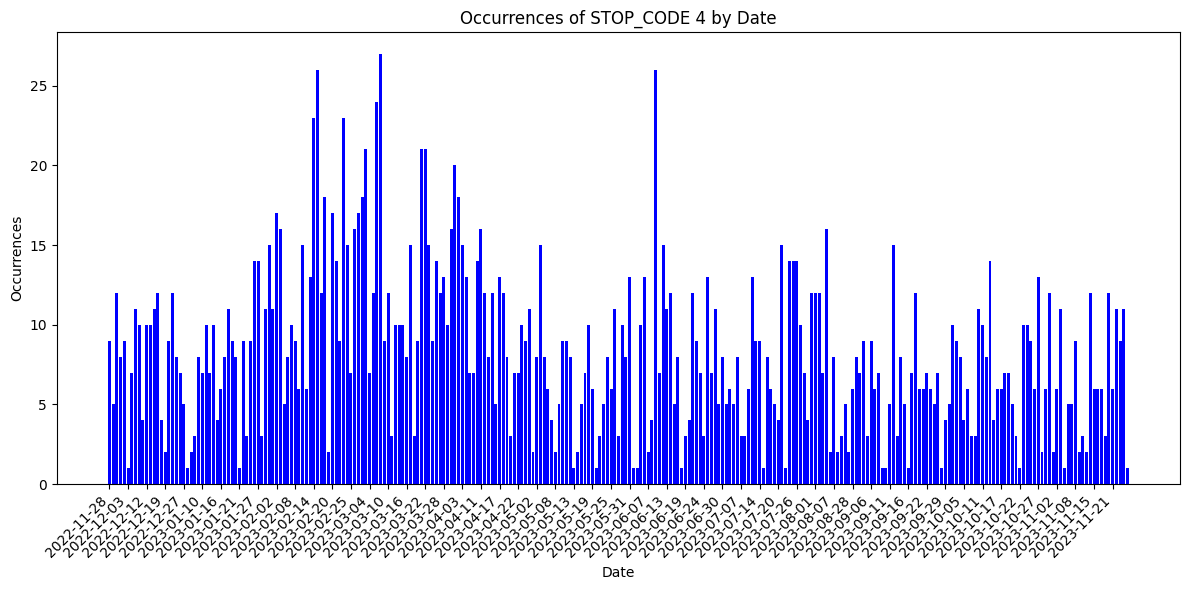

In [42]:
stop_code_4_dates.sort_values('SHIFT_DATE', inplace=True)

# Utilizzo del DataFrame ottenuto precedentemente
plt.figure(figsize=(12, 6))
plt.bar(stop_code_4_dates['SHIFT_DATE'], stop_code_4_dates['Occurrences'], color='blue')
plt.title('Occurrences of STOP_CODE 4 by Date')
plt.xlabel('Date')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')

# Riduci il numero di ticks sull'asse x (selezionando ogni n-esimo tick)
n = 5
plt.xticks(stop_code_4_dates['SHIFT_DATE'][::n])

plt.tight_layout()

# Mostra il grafico
plt.show()

In [45]:
# Lista unica dei macchinari
resources = stop_code_4_occurrences['RESOURCE'].unique()

# Imposta la larghezza massima della colonna per una migliore visualizzazione
pd.set_option('display.max_colwidth', 1000)

# Utilizzo del DataFrame ottenuto precedentemente
for resource in resources:
    data_subset = stop_code_4_occurrences[stop_code_4_occurrences['RESOURCE'] == resource]

    # Stampa il DataFrame per ogni macchinario
    print(f'\nOccurrences for Resource {resource}:\n{data_subset}')

    # Imposta l'opzione per evitare il troncamento della visualizzazione del DataFrame
    pd.set_option('display.expand_frame_repr', False)



Occurrences for Resource 110:
      SHIFT_DATE  STOP_CODE                                   DESFERM  RESOURCE  Occurrences
0     2022-11-28          4  Manutenzione ordinaria                         110            2
7     2022-11-29          4  Manutenzione ordinaria                         110            1
20    2022-12-01          4  Manutenzione ordinaria                         110            2
25    2022-12-02          4  Manutenzione ordinaria                         110            1
34    2022-12-06          4  Manutenzione ordinaria                         110            1
...          ...        ...                                       ...       ...          ...
1444  2023-11-20          4  Manutenzione ordinaria                         110            1
1453  2023-11-21          4  Manutenzione ordinaria                         110            1
1457  2023-11-22          4  Manutenzione ordinaria                         110            1
1463  2023-11-23          4  Manutenzio

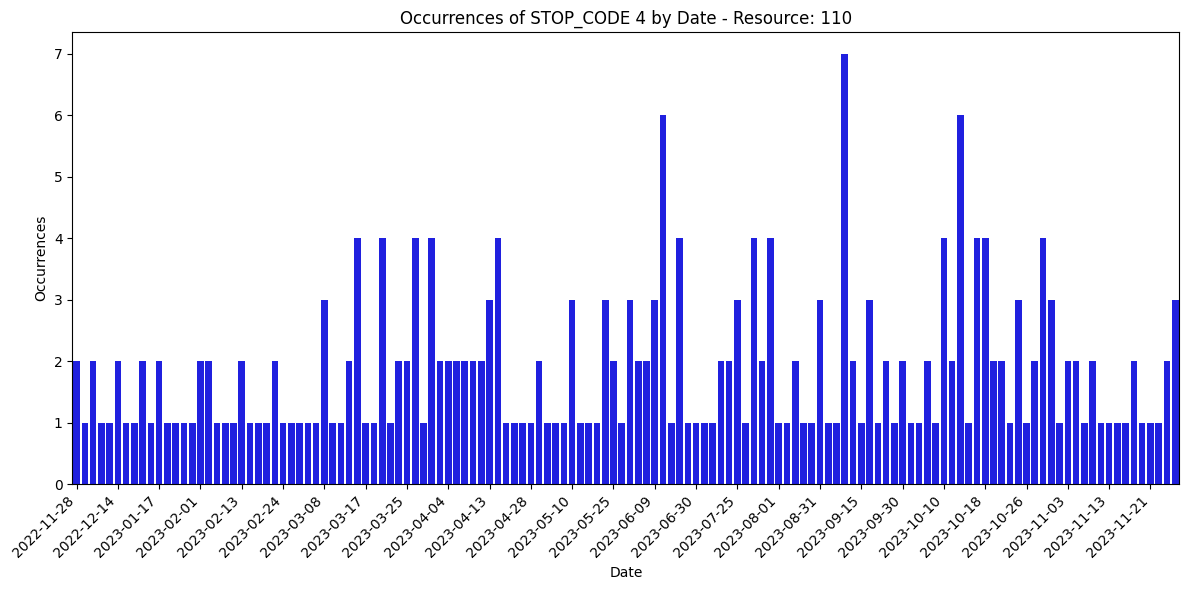

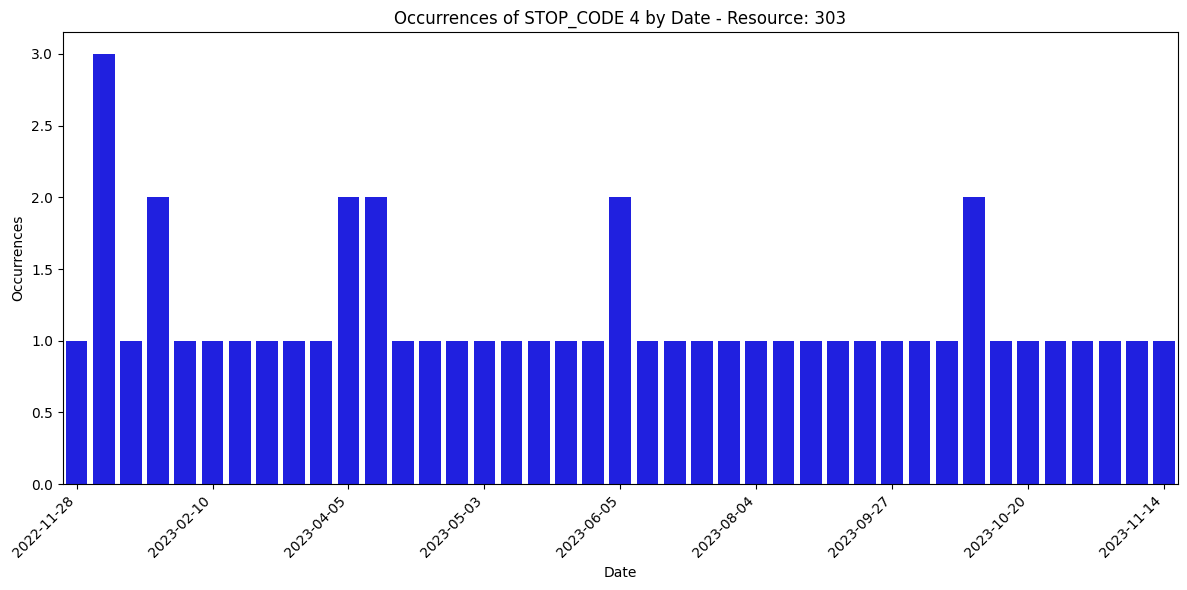

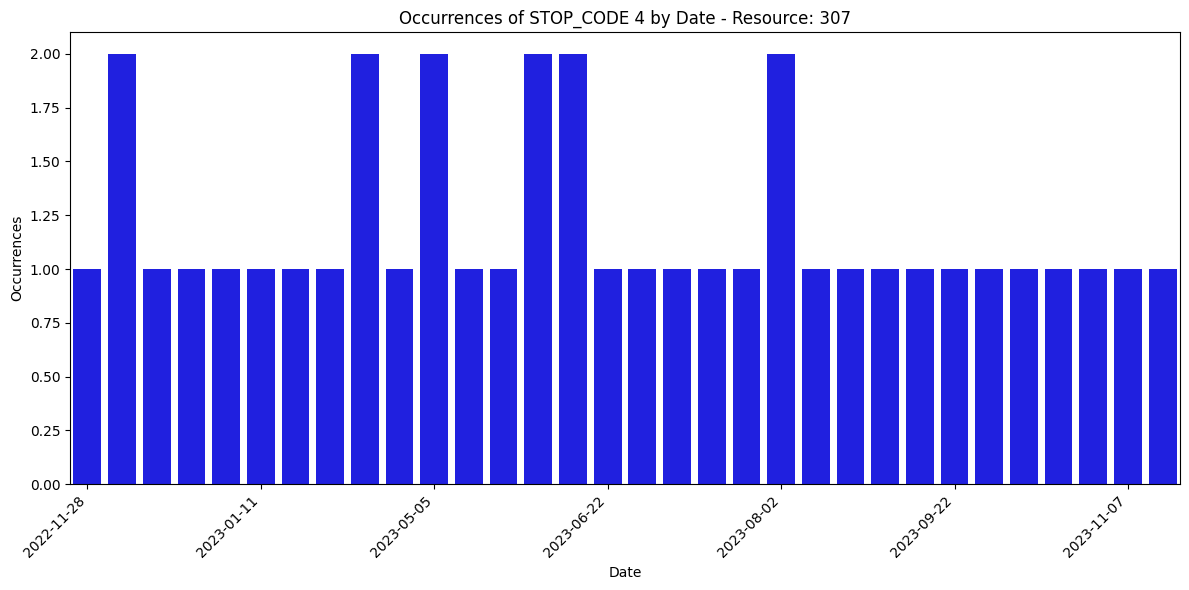

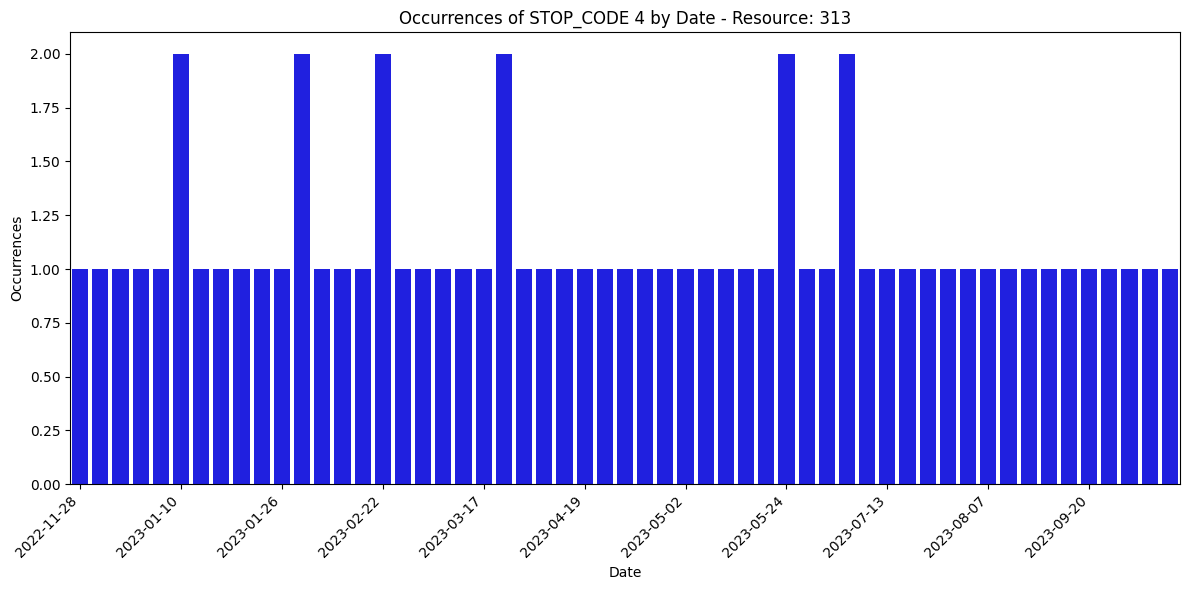

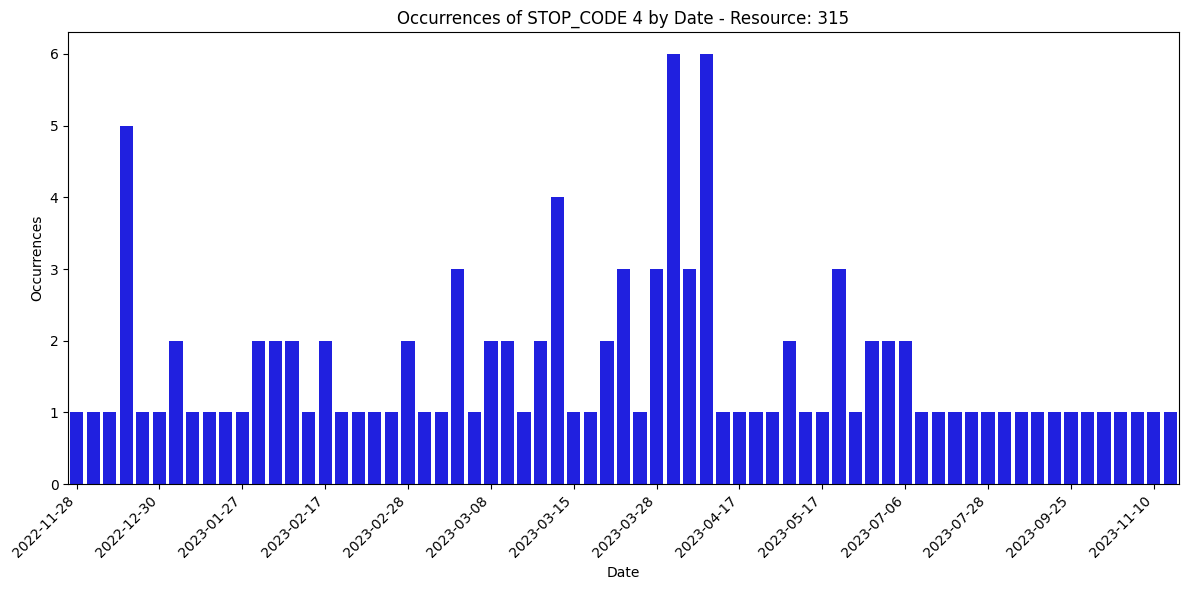

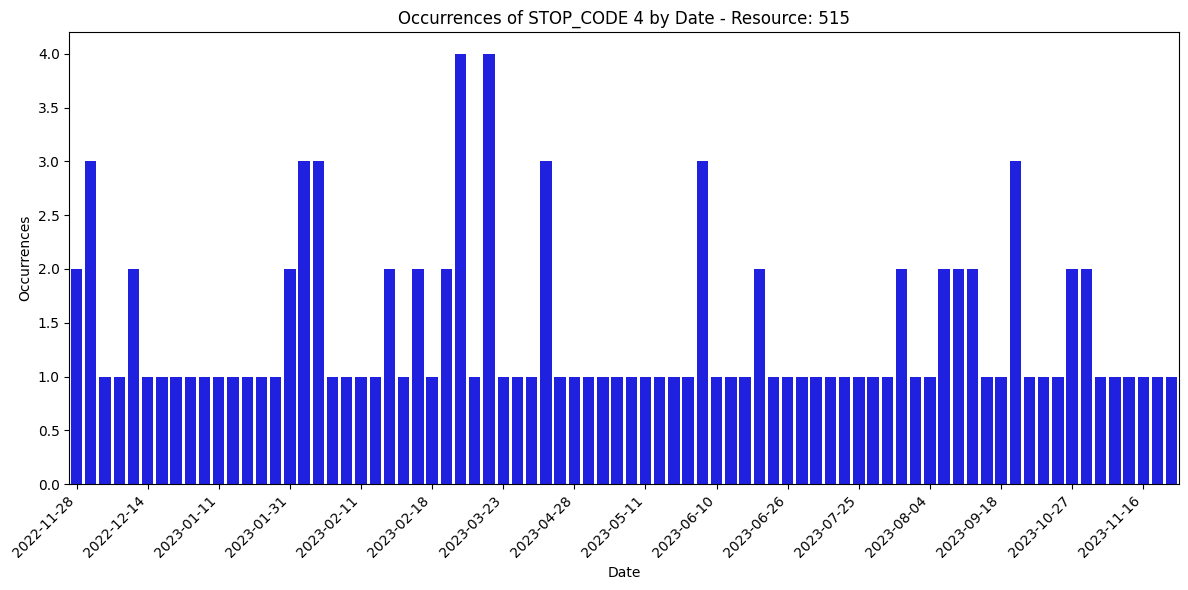

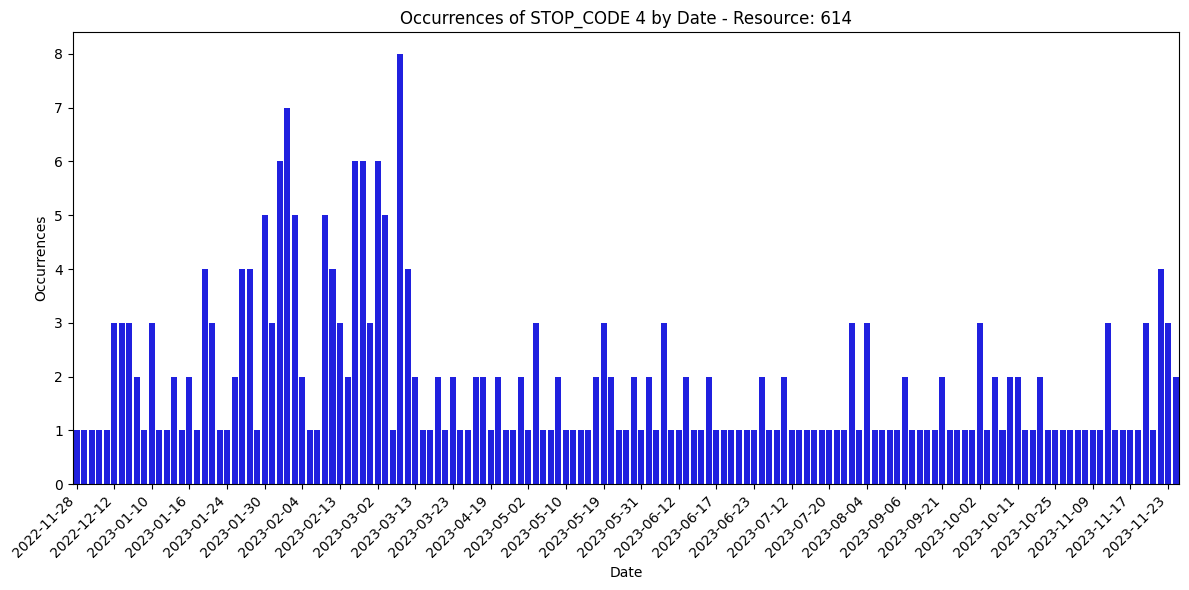

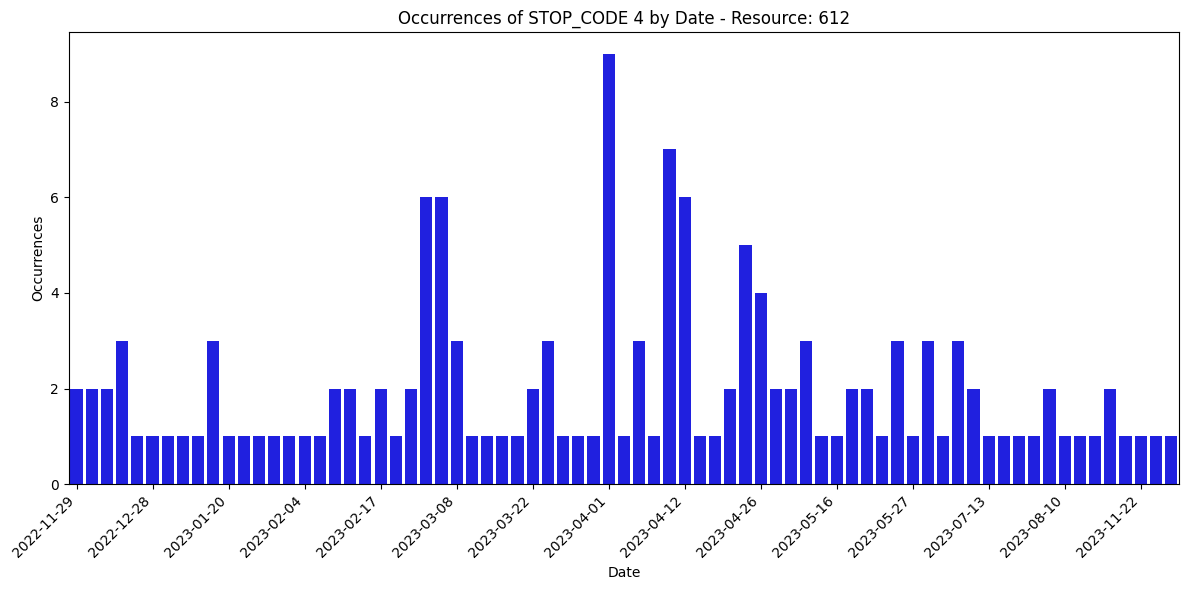

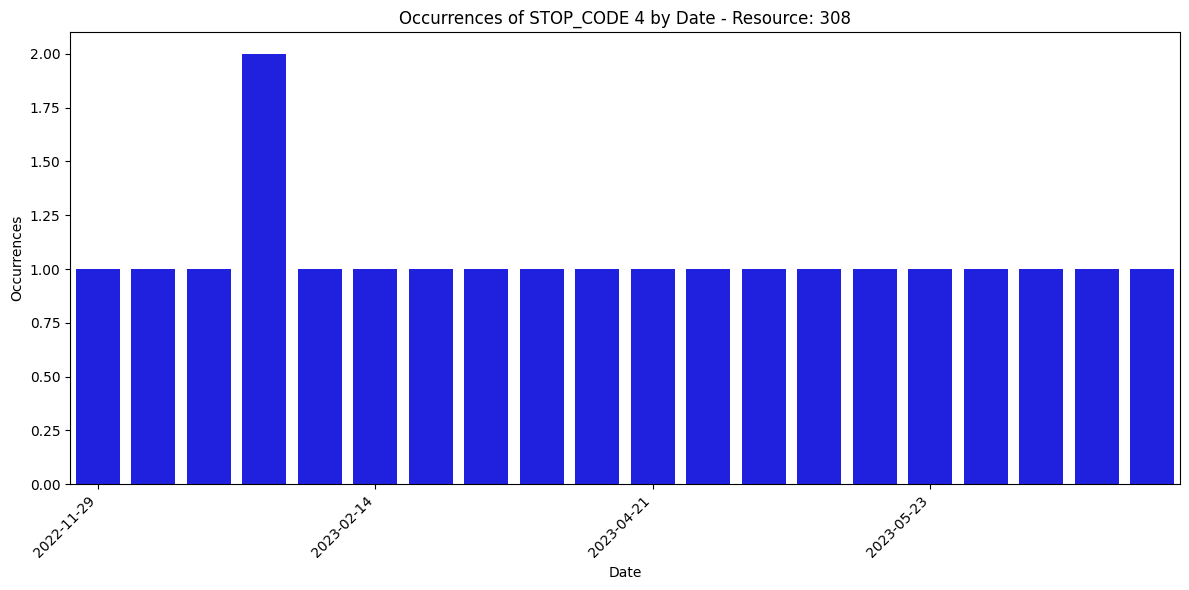

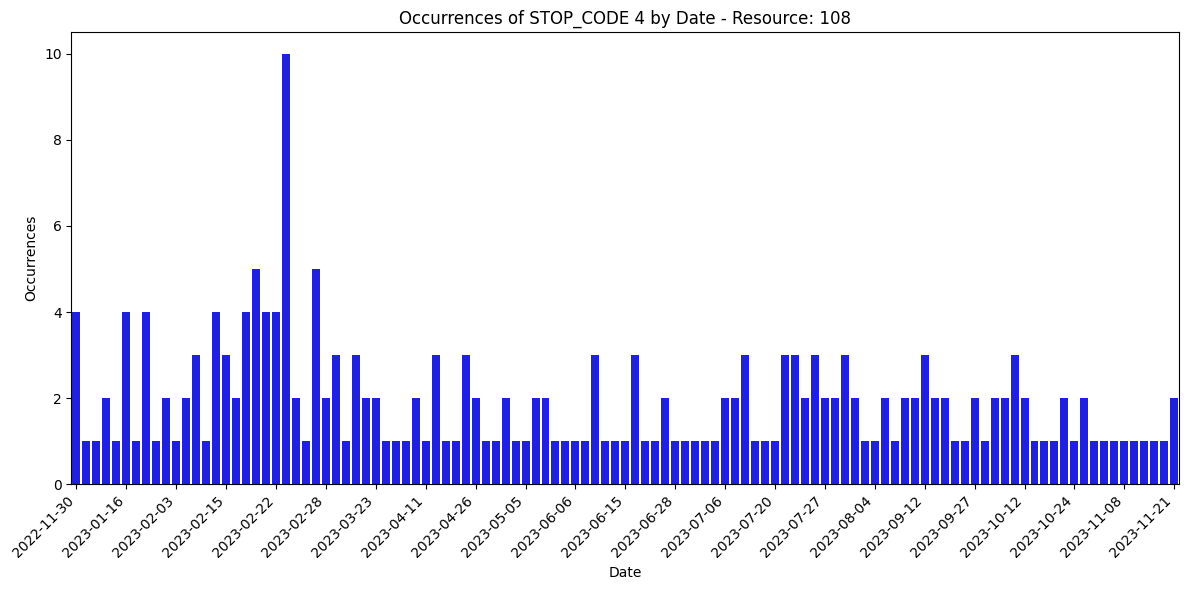

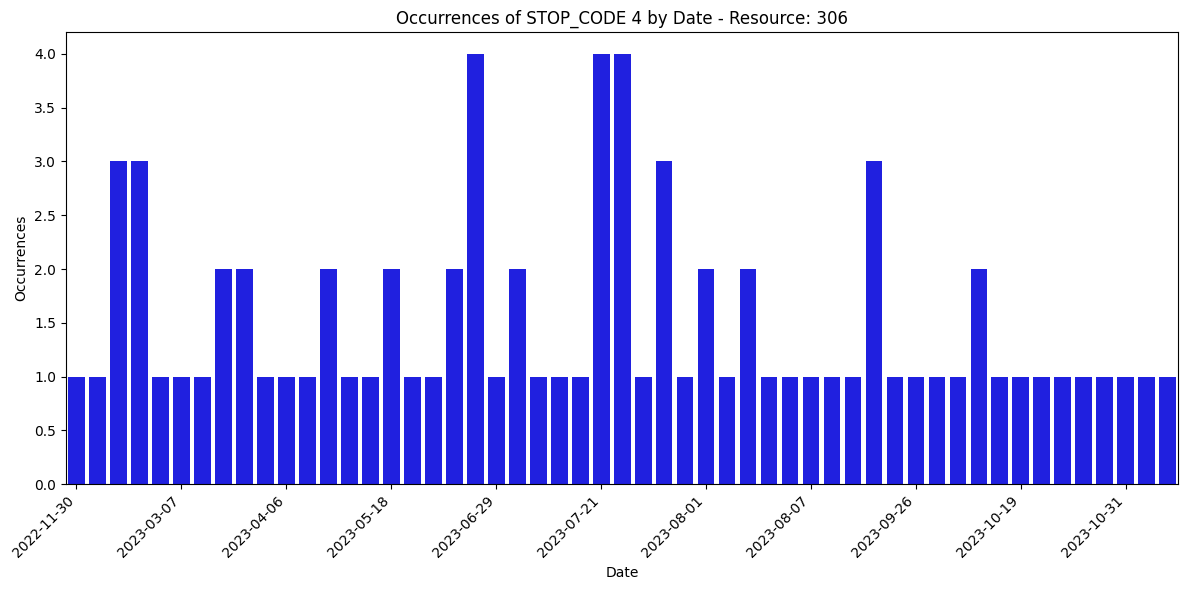

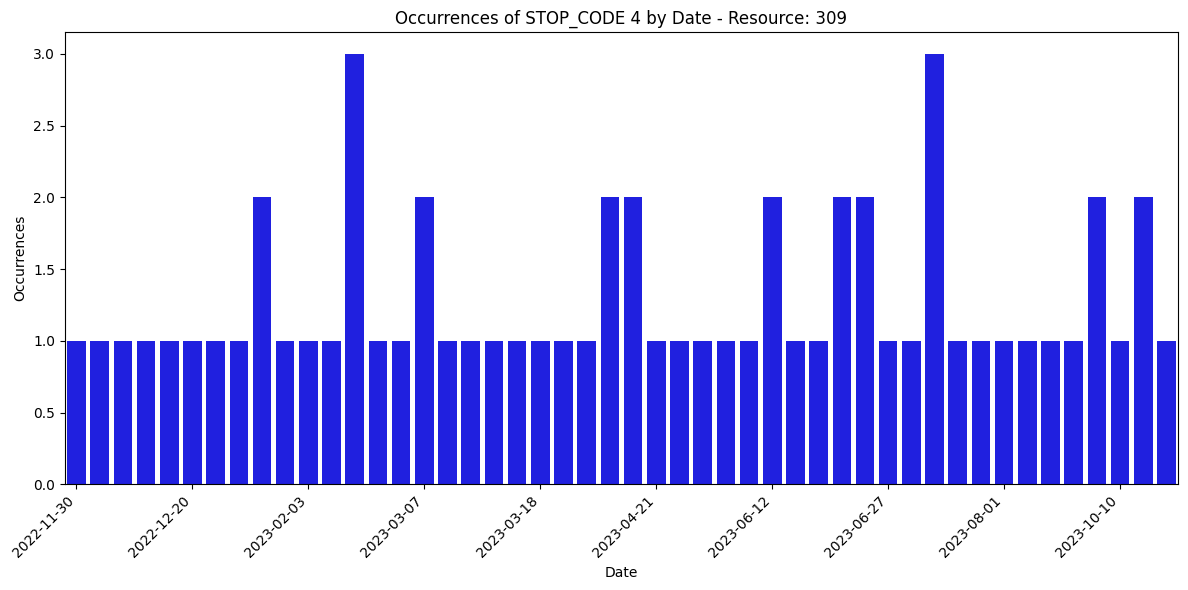

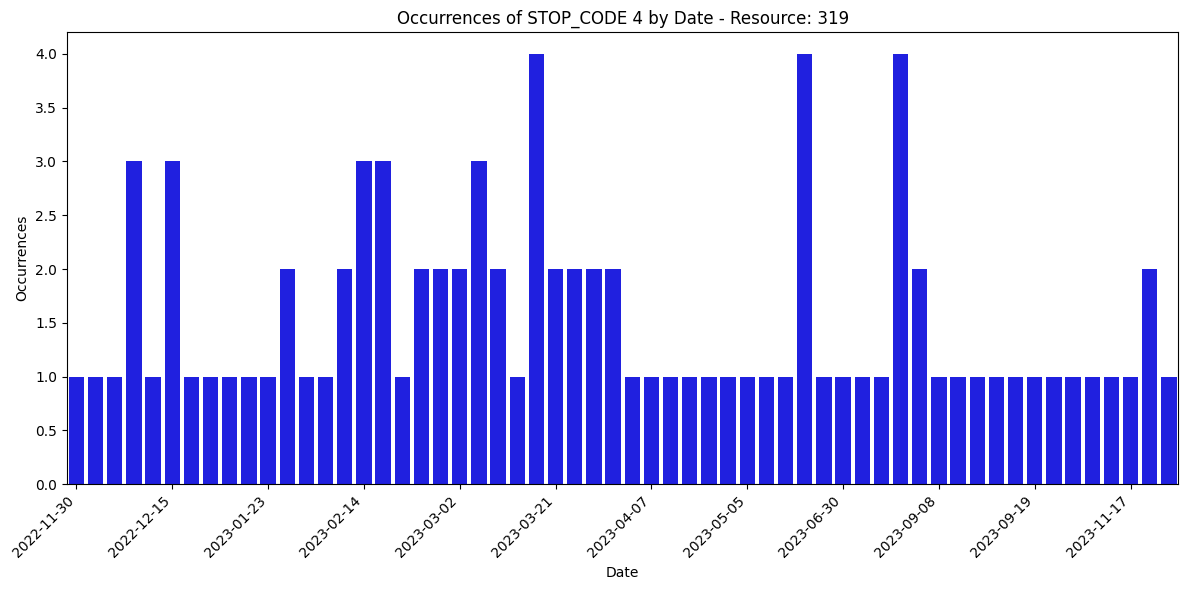

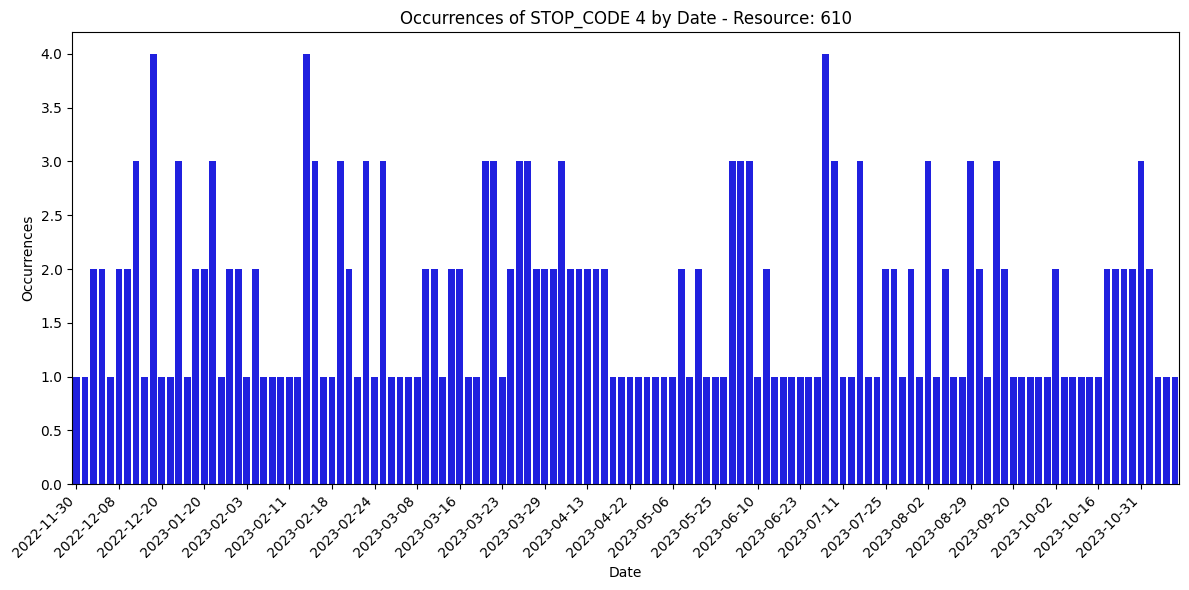

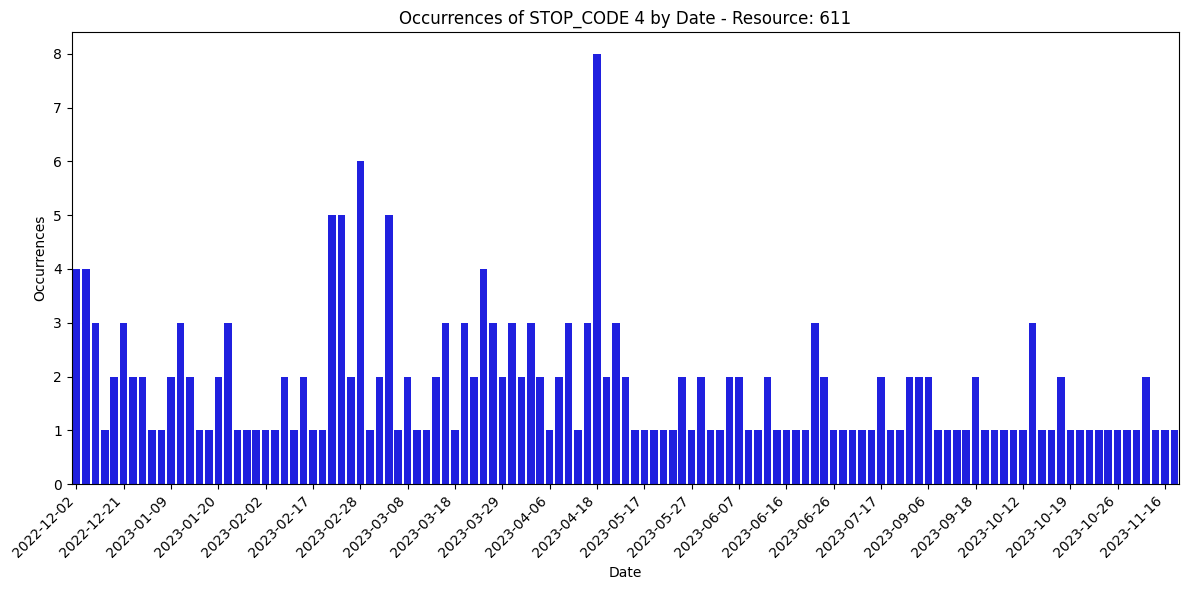

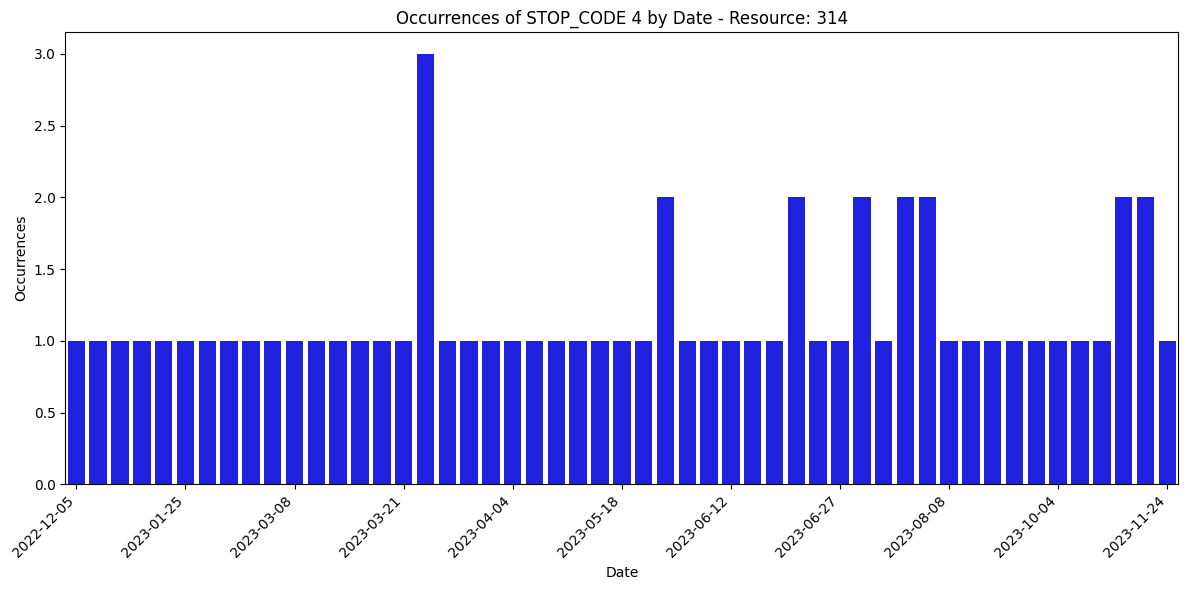

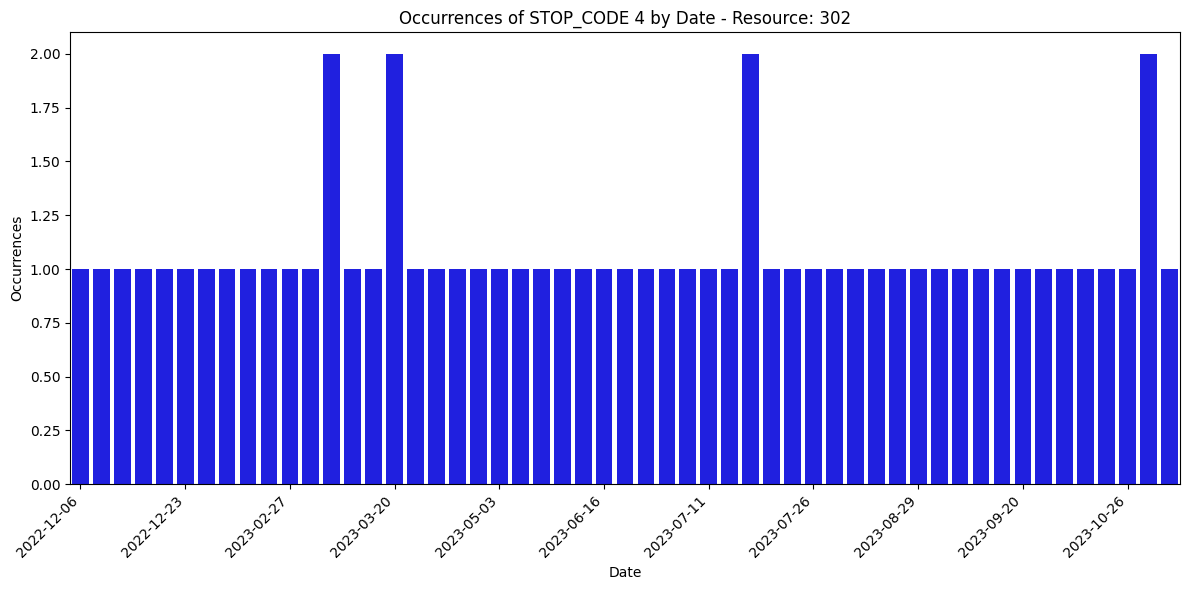

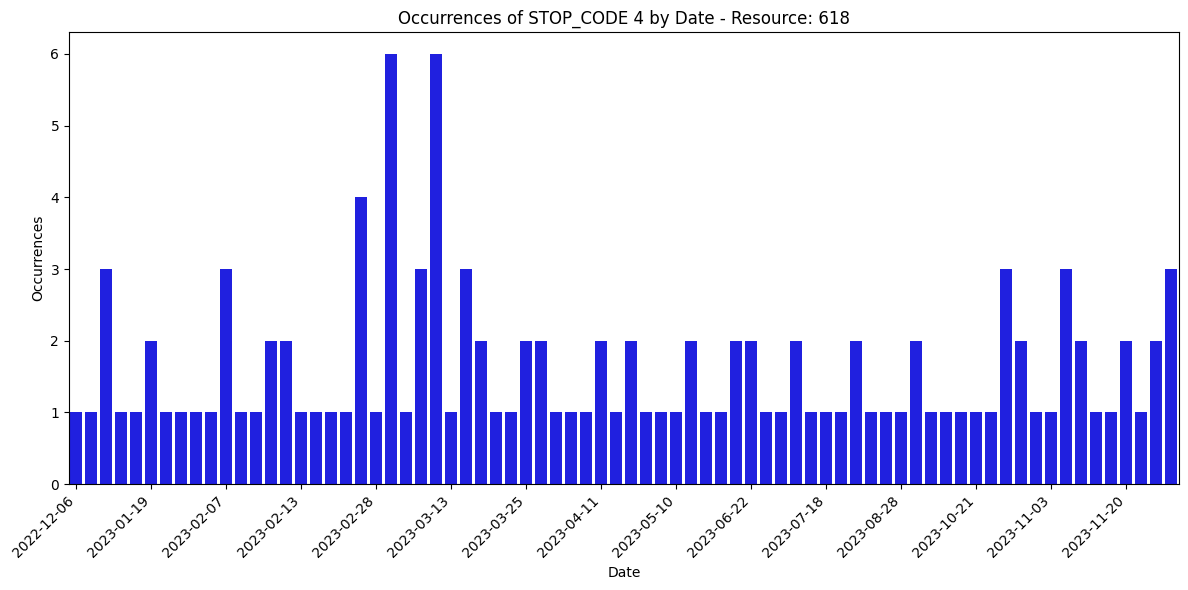

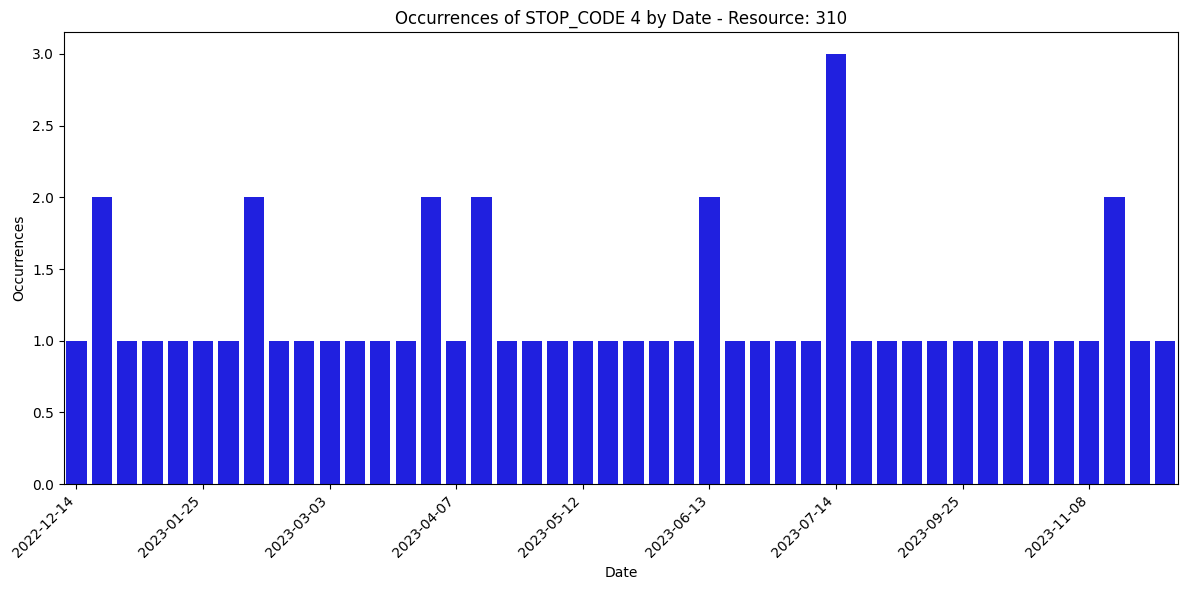

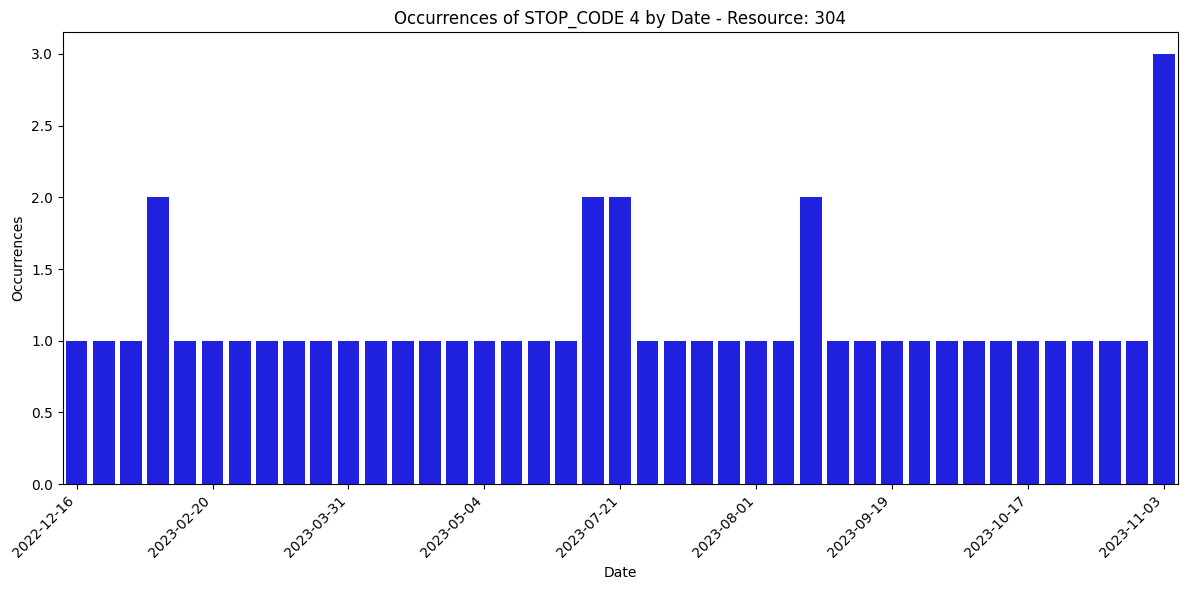

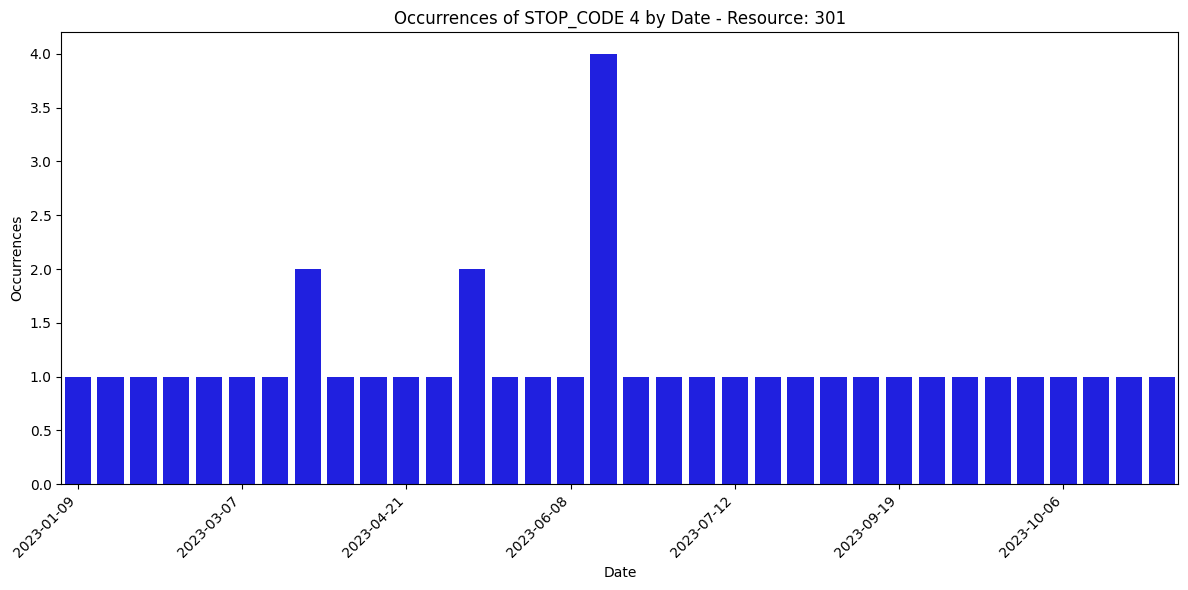

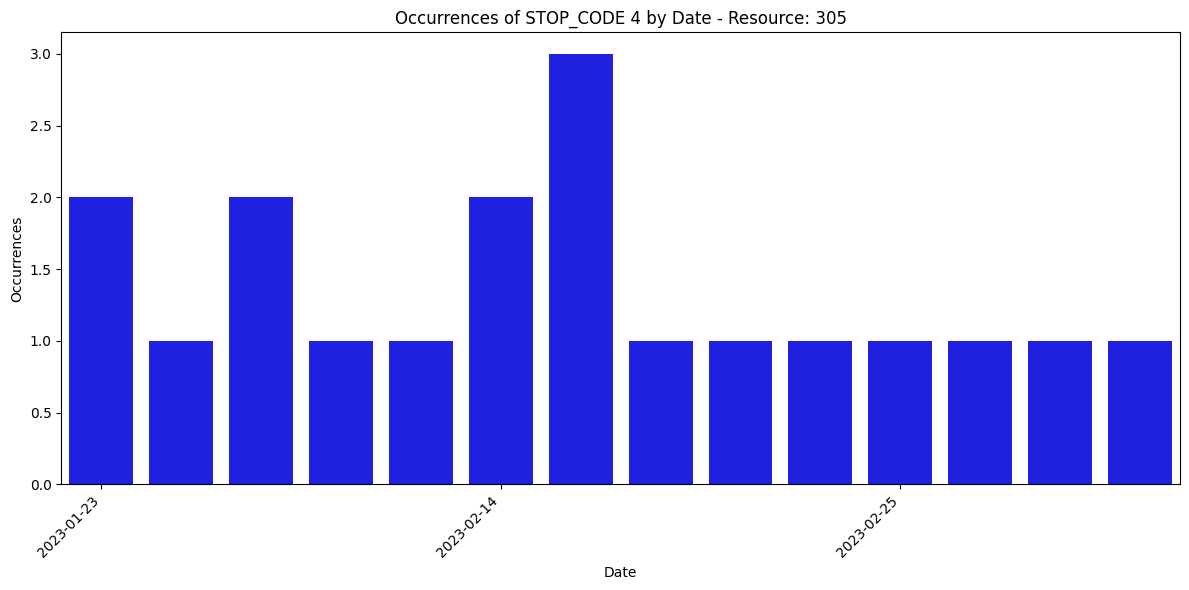

In [46]:
import seaborn as sns

# Ordina il DataFrame per data
stop_code_4_occurrences.sort_values('SHIFT_DATE', inplace=True)

# Lista unica dei macchinari
resources = stop_code_4_occurrences['RESOURCE'].unique()

# Utilizzo del DataFrame ottenuto precedentemente
for resource in resources:
    data_subset = stop_code_4_occurrences[stop_code_4_occurrences['RESOURCE'] == resource]

    plt.figure(figsize=(12, 6))
    sns.barplot(x='SHIFT_DATE', y='Occurrences', data=data_subset, color='blue')
    plt.title(f'Occurrences of STOP_CODE 4 by Date - Resource: {resource}')
    plt.xlabel('Date')
    plt.ylabel('Occurrences')
    plt.xticks(rotation=45, ha='right')

    n = 5
    plt.xticks(data_subset['SHIFT_DATE'][::n])

    plt.tight_layout()

    # Mostra il grafico
    plt.show()